In [ ]:
# !pip install qiskit pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d2d2cd8a6d4ed2b20aab82943575abf2bfd49ce47a89e24715b968fac8ba5d6a
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
# !pip list | grep qiskit

qiskit                                   2.2.3


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### **Methods**

Let's consider a classical dataset

$$\mathcal{X} = \{x^{(1)}, x^{(2)}, \ldots, x^{(M)}\}$$

consisting of $M$ samples, each sample having $N$ features.
Each data point is written as:

$$x^{(m)} = (x^{(m)}_1,\; x^{(m)}_2,\; \ldots,\; x^{(m)}_N)$$

To represent this dataset in a quantum system, we can use various embedding techniques.

---


#### **1. Basis encoding**

---


**Basis Encoding**

<br>


Basis encoding associates a classical $N$-bit string with a computational basis state of an $N$-qubit quantum system.

---


<br>

**Example**
<br>If we have a classical number:
$$x = 5$$

Its 4-bit binary representation is:
$$0101$$

This maps directly to the 4-qubit quantum state:
$$|0101\rangle$$

---


<br>

**General Definition**
<br>For an $N$-bit classical string:
$$x = (b_1, b_2, \ldots, b_N)$$
where each bit $b_n \in \{0,1\}$, the corresponding quantum state is:

$$|x\rangle = |b_1\, b_2\, \cdots\, b_N\rangle$$

Thus, each bit becomes one qubit in a computational basis state.

---


<br>

**Basis Encoding for a Dataset**
<br>For a dataset of $M$ samples:
$$\mathcal{X} = \{x^{(1)}, x^{(2)}, \ldots, x^{(M)}\}$$

Where each sample is an $N$-bit string:
$$x^{(m)} = (b_1, b_2, \ldots, b_N)$$

Basis encoding maps each sample to the quantum state:
$$|x^{(m)}\rangle = |b_1 b_2 \cdots b_N\rangle$$

If we want to encode all samples at once, we may construct a superposition:

$$|\mathcal{X}\rangle = \frac{1}{\sqrt{M}} \sum_{m=1}^{M} |x^{(m)}\rangle$$

---

<br>

**Example**
<br>If the dataset contains classical bitstrings such as:
$$\mathcal{X} = \{x^{(1)} = 101,\; x^{(2)} = 111\}$$

Then the encoded quantum state is:

$$|\mathcal{X}\rangle = \frac{1}{\sqrt{2}} \left( |101\rangle + |111\rangle \right)$$


---

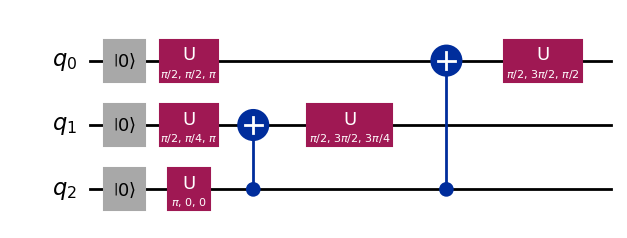

In [ ]:
from qiskit import QuantumCircuit
import math

desired_state = [
    0,
    0,    # coefficient for |001>
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2),
]

qc_basisEncoding = QuantumCircuit(3)
qc_basisEncoding.initialize(desired_state, [0, 1, 2])
qc_basisEncoding.decompose().decompose().decompose().decompose().decompose().draw('mpl')

#### **2. Amplitude encoding**

---

**Amplitude Encoding**

Amplitude encoding represents a classical real-valued vector directly in the amplitudes of a quantum state.

Given a classical vector:
$$x = (x_1, x_2, \ldots, x_{2^n})$$

We encode it into an $n$-qubit quantum state:

$$|x\rangle = \sum_{i=0}^{2^n - 1} \frac{x_i}{\|x\|} |i\rangle$$

This requires that the vector is normalized:
$$\|x\| = \sqrt{\sum_i x_i^2}$$

**Key Benefit:** Amplitude encoding is extremely efficient in terms of qubits because one state of $2^n$ amplitudes needs only $n$ qubits.

---

<br>

**Example**

For a 2-qubit system (4 amplitudes):
$$x = (1,\;2,\;3,\;4)$$

**1. Normalize the vector:**
$$\|x\| = \sqrt{1^2+2^2+3^2+4^2} = \sqrt{30}$$

**2. Encoded quantum state:**
$$|x\rangle = \frac{1}{\sqrt{30}} \left( 1|00\rangle + 2|01\rangle + 3|10\rangle + 4|11\rangle \right)$$

---

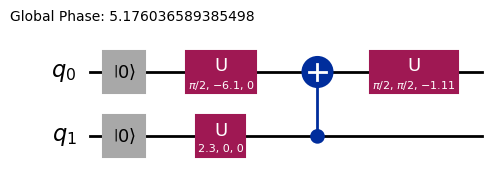

In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4], dtype=float)
x = x / np.linalg.norm(x)

qc = QuantumCircuit(2)
qc.initialize(x, [0, 1])
qc.decompose().decompose().decompose().decompose().decompose().draw('mpl')

#### **3. Angle encoding**

---

**Angle Encoding**

Angle encoding maps each classical feature into the rotation angle of a single-qubit gate.

Given a data vector:
$$x = (x_1, x_2, \ldots, x_N)$$

Each feature is encoded using a rotation:

$$|x\rangle = \bigotimes_{i=1}^{N} R_{\alpha}(x_i)\,|0\rangle$$

**Common Choices**
* $$R_Y(x_i)$$ → rotation around Y-axis
* $$R_X(x_i)$$ → rotation around X-axis
* $$R_Z(x_i)$$ → rotation around Z-axis

---

<br>

**Example (Y-rotation encoding)**
<br>If we choose Y-rotations, the state becomes:

$$|x\rangle = R_Y(x_1) \otimes R_Y(x_2) \otimes \cdots \otimes R_Y(x_N)\, |0\rangle^{\otimes N}$$

---

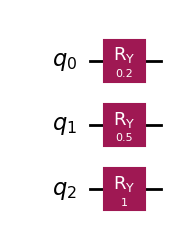

In [ ]:

x = [0.2, 0.5, 1.0]
qc = QuantumCircuit(3)
for i, val in enumerate(x):
    qc.ry(val, i)

qc.draw('mpl')

#### **4. Arbitrary encoding**

---

**Arbitrary Encoding Using EfficientSU2**

<br>

**EfficientSU2** is a variational circuit capable of encoding arbitrary input vectors by assigning data to its rotation parameters.

Given a feature vector $x$:

$$|x\rangle = U_{\text{EfficientSU2}}(x) |0\rangle^{\otimes n}$$

The unitary is defined as:

$$U_{\text{EfficientSU2}}(x) = \prod_{k=1}^{L} \left[ \left( \prod_{i=1}^{n} R_{\alpha}(\theta^{(k)}_i = x_i) \right) \left( \prod_{(i,j)\in E} CX_{ij} \right) \right]$$

Where:
* $R_{\alpha} \in \{RX, RY, RZ\}$
* $E$ defines the set of entangling pairs.


---



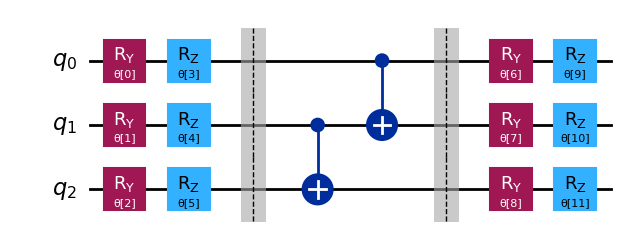

In [ ]:
from qiskit.circuit.library import EfficientSU2

qc = EfficientSU2(
    num_qubits=3,
    reps=1,
    insert_barriers=True
)
qc.decompose().draw('mpl')

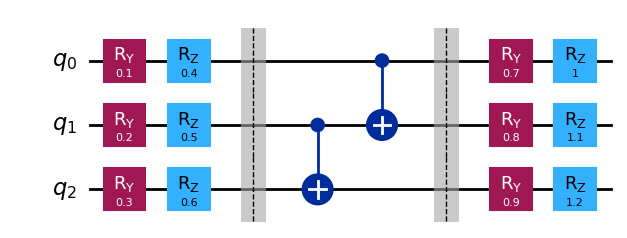

In [ ]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
encode = qc.assign_parameters(x)
encode.decompose().draw('mpl')


**Arbitrary Encoding Using ZZFeatureMap**

<br>

**ZZFeatureMap** encodes single features and pairwise interactions via $RZ$ and $RZZ$ rotations.

Given a feature vector:
$$x = (x_1, x_2, \ldots, x_n)$$

The encoded unitary is:

$$U_{\text{ZZ}}(x) = \left( \prod_{i=1}^{n} e^{i x_i Z_i} \right) \left( \prod_{i<j} e^{i(\pi - x_i)(\pi - x_j) Z_i Z_j} \right) H^{\otimes n}$$

---

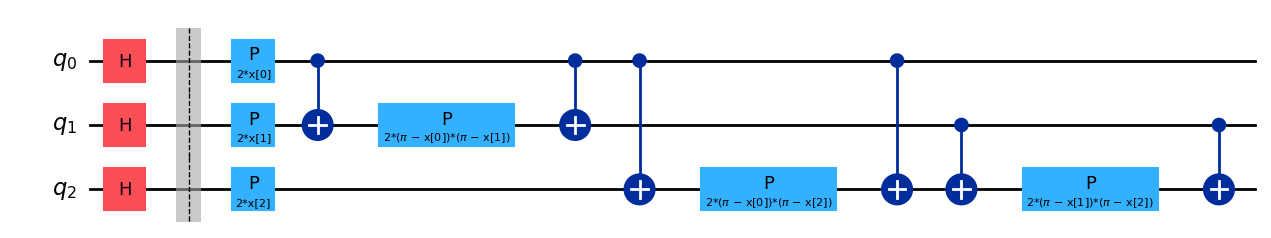

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

qc = ZZFeatureMap(
    feature_dimension=3,
    reps=1,
    insert_barriers=True
)
qc.decompose().draw('mpl')

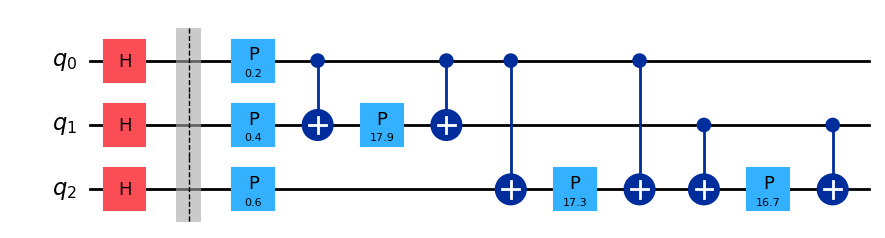

In [ ]:
x = [0.1, 0.2, 0.3]
encode = qc.assign_parameters(x)
encode.decompose().draw('mpl')